**Author**: Fabrizio Lucero Fernández. https://www.linkedin.com/in/fabrizio-lucero/

<font size="4.5">**Data Analytics in the Sports World: Assesing 2017/2018 English Premier League Data through Machine Learning**</font>

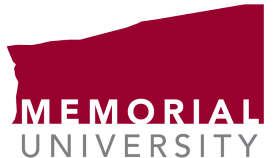

**Libraries**: Appart from the usual libraries we have been using throughout the project now we added the confusion matrix from ```sk_learn.metrics```

In [45]:
import import_ipynb
import definitions as ds
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix

Reading Level 2 xlsx file, and adding the opposition statistics for a deeper analysis. 

In [79]:
#Charging Datasets for analysis
#Level 3 (Fixing match Id for accounting both teams in the match.)
Level3=pd.read_excel('Level3.xlsx')

#Showing results after connecting opposition stats to compare with performance.
Level3_df=ds.Opposites_To(Level3)

#for just now, keeping out team Id indicator
notsearchfor=['teamId_x','teamId_y','matchId_x','matchId_y','shot','Goalkeeper','Save attempt','Shot']
Level3_df=Level3_df.drop(Level3_df.columns[Level3_df.columns.str.contains('')==Level3_df.columns.str.contains('|'.join(notsearchfor))],axis=1)
searchfor=['Accurate','Not Accurate','Outcome','Home']
Level3_df=Level3_df[Level3_df.columns[Level3_df.columns.str.contains('')==Level3_df.columns.str.contains('|'.join(searchfor))]]

**Model Try-Out**: Trying out different model that could work well with classifying 1- Victory 0 - Draw/Defeat. Selection of 6 models, using ```GridSearchCV``` evaluating different parameters for each model depending on the matchweeks and stats from matches in the train set. 

In this case evaluated test window is moving, if "Final Matchweek" analyzed is f.ex: 30, test set will consist of the 3 following matchweek matches. Matches from MW: 31, 32, 33.
<br>
**Transformation_ByOrder function:** with the following parameters... 
>-**X**: Dataset of events to be transformed.
<br>
>-**Origin**: Index of the start of the analyzed set of events. 
<br>
>-**Border**: Index of the end of the analyzed set of events. 
<br>
>-**Test**: Index length of the test set of events. 

*For more info visit this link:*
<br>
**Modelling function**: with the following parameters...
>**x**: feature train set to be modeled.
<br>
>**y**: target train set to be modeled.
<br>
>**xt**: feature test set to be modeled.
<br>
>**yt**: target test set to be modeled.
<br>

*For more info visit this link:
<br>
https://github.com/fabriziolufe/GRI-Research---Passing-Networks/blob/main/definitions.ipynb*

In [3]:
#using Modelling function. Trying out grid search over models such as Softmax Regression, XGB, Random Forest, SGD and SVC. 
#For more details look over definitions.ipynb file.

model_df = []
i=0
for i in range (1,20):
    #Initializing train and test sets and showing first results. 
    x_train1, y_train1, x_test1, y_test1=ds.Transformation_ByOrder(Level3_df,ds.Mweeks_Y,ds.Mweeks_Z,[60])
    Data=ds.Modelling(x_train1, y_train1, x_test1, y_test1)
    #appending obtained data into an array
    model_df.append(Data['Results'])
    i=i+1
    

#Creating the dataframe.
model_df = pd.concat(model_df).reset_index().drop('index',axis=1)  


#showing results.
model_df.groupby(['Model']).mean()

Start Matchweek:  15.0 Final Matchweek:  35.0
Start Matchweek:  8.0 Final Matchweek:  33.0
Start Matchweek:  8.0 Final Matchweek:  13.0
Start Matchweek:  13.0 Final Matchweek:  33.0
Start Matchweek:  22.0 Final Matchweek:  27.0
Start Matchweek:  1.0 Final Matchweek:  26.0
Start Matchweek:  20.0 Final Matchweek:  25.0
Start Matchweek:  2.0 Final Matchweek:  27.0
Start Matchweek:  10.0 Final Matchweek:  20.0
Start Matchweek:  18.0 Final Matchweek:  33.0
Start Matchweek:  14.0 Final Matchweek:  24.0
Start Matchweek:  25.0 Final Matchweek:  35.0
Start Matchweek:  4.0 Final Matchweek:  14.0
Start Matchweek:  3.0 Final Matchweek:  18.0
Start Matchweek:  0.0 Final Matchweek:  5.0
Start Matchweek:  12.0 Final Matchweek:  32.0
Start Matchweek:  4.0 Final Matchweek:  19.0
Start Matchweek:  23.0 Final Matchweek:  33.0
Start Matchweek:  22.0 Final Matchweek:  32.0


,Training F1 Score,Training Accuracy,Testing F1 Score,Testing Accuracy
Model,,,,
Random Forest,0.852369,0.859912,0.742093,0.781579
SGD Classifier,0.861516,0.862789,0.801057,0.807018
SVM Classifier,0.871879,0.875219,0.770847,0.802632
Softmax Regression,0.876920,0.879535,0.787864,0.807895
Voting Classifier,0.847940,0.857456,0.716873,0.764912
XG Boost,0.937184,0.937746,0.789911,0.800877


Proceeding to evaluate two different models ( with best accuracy for the data...). First run with ```XGBClassifier()``` and Second run with ```LogisticRegression()```

**FIRST RUN (XGBOOST)**

In [ ]:
#best classifier
# Training and testing sets (random)
x_train, y_train, x_test, y_test=ds.Transformation_ByOrder(Level3_df,[0],[380],[100])

##parameters for GridSearch
parameters = {'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],'n_estimators': [40,50],'max_depth': [2, 3, 4,None],
              'colsample_bytree': [0.2,0.3,0.5,0.6,0.8],'alpha': [1e-5] }
##creating a scorer for the model
f1_scorer=ds.make_scorer(ds.f1_score, pos_label=1, average='weighted')

#Grid Search
XGB_fit=ds.xgb.XGBClassifier(eval_metric='mlogloss')
grid_obj = ds.GridSearchCV(XGB_fit, scoring=f1_scorer, param_grid=parameters,cv=5).fit(x_train,y_train, eval_metric='mlogloss')

##Obtaining best Estimator
xgb_clf=grid_obj.best_estimator_
#feature importance
fit_coef=xgb_clf.feature_importances_
print('Model Classifier: ', xgb_clf)

Use of the `Iteration_by_Matchweeks` function. 
<br>
**Iteration_by_Matchweeks function:** Accounts for the following parameters..
<br>
>**Level_Dataset**: Dataset of grouped events at the selected level. 1,2 or 3.
<br>
>**Classifier**: Selected classifier to model.
<br>
>**Importance**: feature importance
<br>
>**Iterations**: 'int', # of iterations

*For more info visit the link:
<br>
https://github.com/fabriziolufe/GRI-Research---Passing-Networks/blob/main/definitions.ipynb*

In [4]:
#XGB Results
XGBdf=ds.Iteration_by_Matchweeks(Level3_df, xgb_clf,fit_coef,100)
XGBdf.groupby(['top n_features'])['accuracy in test', 'F1 Score'].mean().sort_values(by='accuracy in test',ascending=False)

Start Matchweek:  0.0 Final Matchweek:  19.0
Model Classifier:  XGBClassifier(alpha=1e-05, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=9.99999975e-06, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
Start Matchweek:  8.0 Final Matchweek:  18.0
Start Matchweek:  4.0 Final Matchweek:  29.0
Start Matchweek:  2.0 Final Matchweek:  7.0
Start Matchweek:  9.0 Final Matchweek:  34.0
Start Matchweek:  15.0 Final Matchweek:  30.0
Start Matchweek:  15.0 Final Matchweek:  30.0
Start Match

,accuracy in test,F1 Score
top n_features,,
4,0.880167,0.879463
5,0.874500,0.873927
6,0.874000,0.873715
8,0.867167,0.866568
9,0.866833,0.865905
...,...,...
316,0.787833,0.783510
317,0.787500,0.783485
3,0.768333,0.759562


After getting results we want to evaluate which were the most important features that accounted for a better model accuracy. By using ```matplotlib.pyplot``` we can generate a Horizonal Bar graph with results.

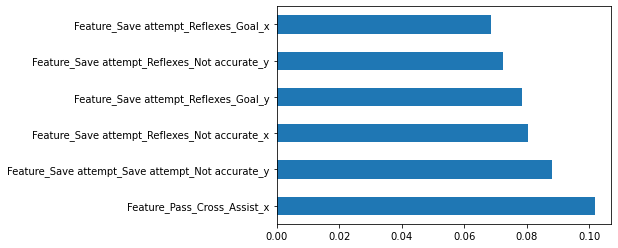

In [5]:
feat_importances =pd.Series(fit_coef, index=x_train.columns)
data=np.power(feat_importances,2)
dataSq=data.nlargest(6)
Xtop=dataSq.index.tolist()

#visualization of feature importance
feat_importances[Xtop].plot(kind='barh')
ds.plt.show()


**SECOND RUN (Logistic Regression)**

In [18]:
#best classifier
## Training and testing sets
#19 first games
x_train2, y_train2, x_test2, y_test2=ds.Transformation_ByOrder(Level3_df,[0],[380],[100])

#Logistic Regression
##Parameters
modelLR= ds.LogisticRegression()
m_class=['auto','ovr','multinomial']
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
gridLR= dict(multi_class=m_class,solver=solvers,penalty=penalty,C=c_values)
cvLR= ds.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_searchLR= ds.GridSearchCV(estimator=modelLR, param_grid=gridLR, n_jobs=-1, cv=cvLR, scoring='accuracy',error_score=0)
softmax_grid = grid_searchLR.fit(x_train2, y_train2)

#best estimator for the grid search
softmax_reg= softmax_grid.best_estimator_
#feature importance
coefficients=softmax_reg.coef_[0]
print('Model Classifier: ', softmax_reg)

LRdf=ds.Iteration_by_Matchweeks(Level3_df, softmax_reg,coefficients,100)
LRdf.groupby(['top n_features'])['accuracy in test', 'F1 Score'].mean().sort_values(by='accuracy in test',ascending=False)

Start Matchweek:  0.0 Final Matchweek:  19.0
Model Classifier:  LogisticRegression(C=100, solver='newton-cg')
Start Matchweek:  25.0 Final Matchweek:  30.0
Start Matchweek:  14.0 Final Matchweek:  34.0
Start Matchweek:  17.0 Final Matchweek:  32.0
Start Matchweek:  7.0 Final Matchweek:  17.0
Start Matchweek:  8.0 Final Matchweek:  18.0
Start Matchweek:  3.0 Final Matchweek:  18.0
Start Matchweek:  20.0 Final Matchweek:  35.0
Start Matchweek:  10.0 Final Matchweek:  35.0
Start Matchweek:  13.0 Final Matchweek:  28.0
Start Matchweek:  3.0 Final Matchweek:  8.0
Start Matchweek:  10.0 Final Matchweek:  20.0
Start Matchweek:  9.0 Final Matchweek:  24.0
Start Matchweek:  9.0 Final Matchweek:  14.0
Start Matchweek:  13.0 Final Matchweek:  18.0
Start Matchweek:  1.0 Final Matchweek:  11.0
Start Matchweek:  15.0 Final Matchweek:  25.0
Start Matchweek:  1.0 Final Matchweek:  11.0
Start Matchweek:  8.0 Final Matchweek:  33.0
Start Matchweek:  5.0 Final Matchweek:  20.0
Start Matchweek:  25.0 Fina

,accuracy in test,F1 Score
top n_features,,
2,0.691000,0.652931
5,0.687500,0.667820
3,0.685667,0.651202
7,0.681833,0.670046
6,0.681167,0.663635
1,0.680167,0.623944
4,0.679167,0.650867
10,0.675667,0.667818
9,0.674833,0.666087


After getting results we want to evaluate which were the most important features that accounted for a better model accuracy. By using ```matplotlib.pyplot``` we can generate a Horizonal Bar graph with results. ```sklearn.metrics``` creates a confusion matrix which guide us into knowing how the classifier works in every specific case.

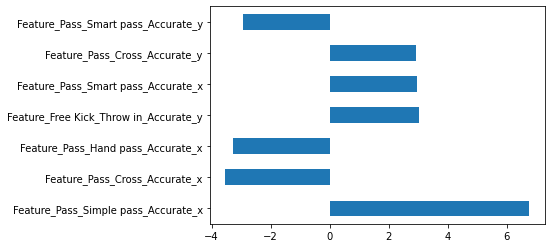

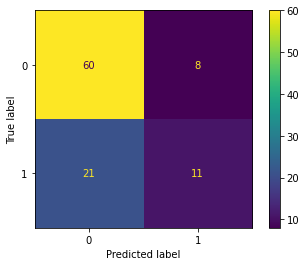

In [28]:
#Feature importances and the feature names assigned. 
feat_importances =pd.Series(coefficients, index=x_train2.columns)

#in order to get both negative and possitives as equal, we transform to the power of 2.
data=np.power(feat_importances,2)
dataSq=data.nlargest(7)
Xtop=dataSq.index.tolist()
x_train_new=x_train2[Xtop]
#visualization of feature importance
feat_importances[Xtop].plot(kind='barh')
ds.plt.show()


softmax_grid = grid_searchLR.fit(x_train_new, y_train2)

#best estimator for the grid search
softmax_reg= softmax_grid.best_estimator_
x_test_new=x_test2[Xtop]
model_clf=softmax_reg
#confusion matrix
plot_confusion_matrix(model_clf, x_test_new, y_test2)  
ds.plt.show()

**SGD Classifier (Third Run)**

In [80]:
#Stochastic Gradient Descend

## Training and testing sets
#19 first games
x_train3, y_train3, x_test3, y_test3=ds.Transformation_ByOrder(Level3_df,[0],[380],[100])


modelSGD=ds.SGDClassifier(random_state=42)
    ##Parameters
loss_ = ['hinge','squared_hinge', 'perceptron']
penalty_= ['l1','elasticnet']
random =[42,20,None]
    ##define grid search
gridSGD = dict(loss=loss_,penalty=penalty_, random_state=random)
cvSGD = ds.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_searchSGD= ds.GridSearchCV(estimator=modelSGD, param_grid=gridSGD, n_jobs=-1, cv=cvSGD, scoring='accuracy',error_score=0)
sgd_grid = grid_searchSGD.fit(x_train3, y_train3)
    ##get best fit
sgd_clf= sgd_grid.best_estimator_
    
    #feature importance
coefficients_=sgd_clf.coef_[0]
print('Model Classifier: ', sgd_clf)

SGDdf=ds.Iteration_by_Matchweeks(Level3_df, sgd_clf,coefficients_,100)
SGDdf.groupby(['top n_features'])['accuracy in test', 'F1 Score'].mean().sort_values(by='F1 Score',ascending=False)

Start Matchweek:  0.0 Final Matchweek:  19.0
Model Classifier:  SGDClassifier(penalty='l1', random_state=42)
Start Matchweek:  1.0 Final Matchweek:  11.0
Start Matchweek:  16.0 Final Matchweek:  26.0
Start Matchweek:  6.0 Final Matchweek:  31.0
Start Matchweek:  9.0 Final Matchweek:  34.0
Start Matchweek:  3.0 Final Matchweek:  28.0
Start Matchweek:  12.0 Final Matchweek:  22.0
Start Matchweek:  6.0 Final Matchweek:  21.0
Start Matchweek:  30.0 Final Matchweek:  35.0
Start Matchweek:  9.0 Final Matchweek:  29.0
Start Matchweek:  9.0 Final Matchweek:  19.0
Start Matchweek:  19.0 Final Matchweek:  29.0
Start Matchweek:  19.0 Final Matchweek:  34.0
Start Matchweek:  1.0 Final Matchweek:  6.0
Start Matchweek:  7.0 Final Matchweek:  12.0
Start Matchweek:  17.0 Final Matchweek:  32.0
Start Matchweek:  9.0 Final Matchweek:  14.0
Start Matchweek:  9.0 Final Matchweek:  19.0
Start Matchweek:  2.0 Final Matchweek:  22.0
Start Matchweek:  27.0 Final Matchweek:  32.0
Start Matchweek:  17.0 Final M

,accuracy in test,F1 Score
top n_features,,
29,0.668667,0.666668
20,0.663167,0.661034
19,0.660167,0.658314
21,0.658667,0.655029
35,0.656667,0.654672
32,0.655000,0.654317
33,0.652333,0.650518
26,0.652000,0.649478
31,0.649167,0.649144


After getting results we want to evaluate which were the most important features that accounted for a better model accuracy. By using matplotlib.pyplot we can generate a Horizonal Bar graph with results. sklearn.metrics creates a confusion matrix which guide us into knowing how the classifier works in every specific case.

Start Matchweek:  0.0 Final Matchweek:  19.0


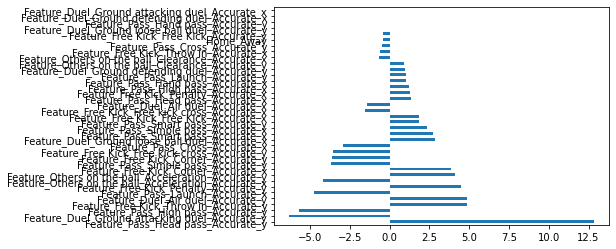

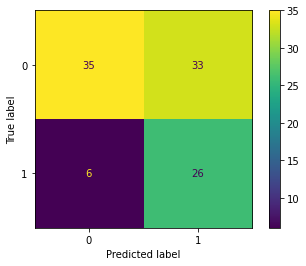

In [85]:
 x_train3, y_train3, x_test3, y_test3=ds.Transformation_ByOrder(Level3_df,[0],[380],[100])

#feature importances    
feat_importances =pd.Series(coefficients_, index=x_train3.columns)
#in order to get both negative and possitives as equal, we transform to the power of 2.
data=np.power(feat_importances,2)
dataSq=data.nlargest(45)
Xtop=dataSq.index.tolist()
x_train_new=x_train3[Xtop]
x_test_new=x_test3[Xtop]
#visualization of feature importance
feat_importances[Xtop].plot(kind='barh')
ds.plt.show()


sgd_grid = grid_searchSGD.fit(x_train_new, y_train3)

#best estimator for the grid search
sgd_clf= sgd_grid.best_estimator_
coefficients_=sgd_clf.coef_[0]




model_clf=sgd_clf
#confusion matrix
plot_confusion_matrix(model_clf, x_test_new, y_test3)  
ds.plt.show()

In this case we get similar results with first two runs. Third Classifier run with the SGD Classifier gives us a different set of results in which accuracy in the 1-Label ( Predicting a win) classifier, gets 81.3 % accuracy, and about 50% accuracy with 0-label. Promising results so far. 
<br>
<br>
>**Despite it, you can try running the model, it would give variations of the model that gives different values for every feature each time. Some times it overfits and even gives negative values to a home advantage ( seems odd). Even though using the features frequency is promising we should investigate a more deeper tool for analyzing passing: GRAPH NETWORKS...**

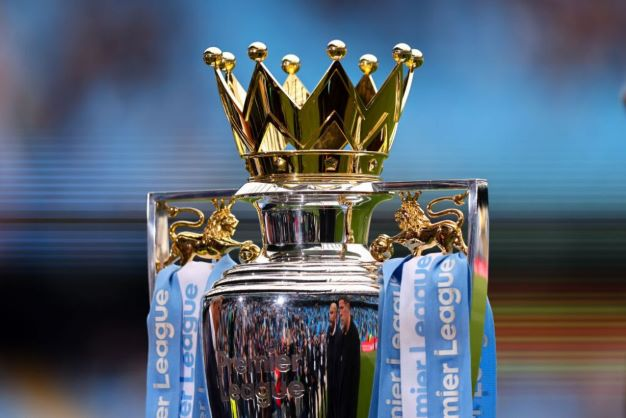

**Link to Original Dataset documentation**:
    https://figshare.com/collections/Soccer_match_event_dataset/4415000/5

**Published article from where Dataset was retrieved**:
Pappalardo, L., Cintia, P., Rossi, A., Massucco, E., Ferragina, P., Pedreschi, D., &amp; Giannotti, F. (2019). A public data  set of spatio-temporal match events in soccer competitions. Scientific Data, 6(1). https://doi.org/10.1038/s41597-019-0247-7 